In [2]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
from PIL import Image
import skimage
from skimage import io
import numpy as np
import cv2
import os

<class 'numpy.ndarray'>


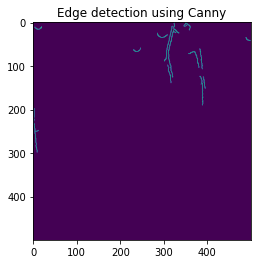

In [3]:
img= io.imread("28\\1-2020-01-28_00-00_0002.png",as_gray=True)
plt.imshow(img)
from skimage.feature import canny
canny_edge=canny(img, 1)
plt.imshow(canny_edge)
plt.title('Edge detection using Canny')
print(type(canny_edge))

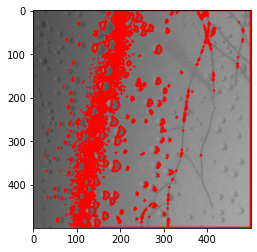

In [20]:
#contouring

img= cv2.imread("28\\1-2020-01-28_00-00_0000.png")
imgray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh= cv2.threshold(imgray,110,255,0)
contours, heirarchy= cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img,contours, -1,(255,0,0),3)
plt.imshow(img)

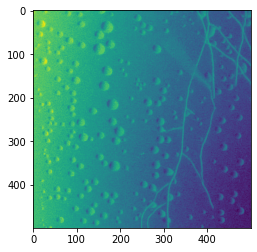

In [21]:
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
img= io.imread("28\\1-2020-01-28_00-00_0000.png",as_gray=True)
image = invert(img)
plt.imshow(image)

In [23]:
def img_grey(data):
    return Image.fromarray(data * 255, mode='L').convert('1')

In [24]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt

Ridge operators


<ipython-input-25-409e5166617a>:9: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  result_img=func(img)
<ipython-input-25-409e5166617a>:9: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  result_img=func(img)


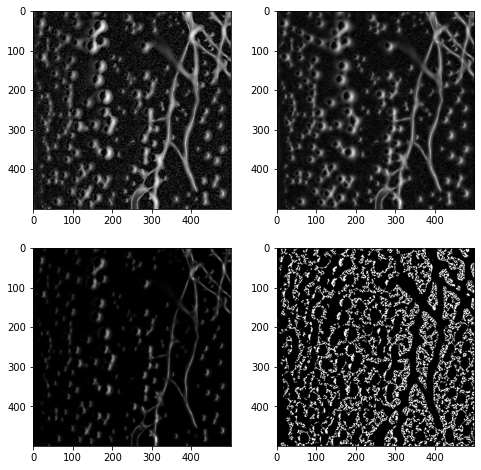

In [25]:
#using ridge operations
cmap = plt.cm.gray
row=2
i=0
column=2
fig = plt.figure(figsize=(8,8))
print("Ridge operators")
for j,func in enumerate([ meijering, sato, frangi, hessian]):
    result_img=func(img)
    i+=1
    fig.add_subplot(row, column, i)
    plt.imshow(result_img, cmap=cmap)

Text(0.5, 1.0, 'Edge Detection using Sobel')

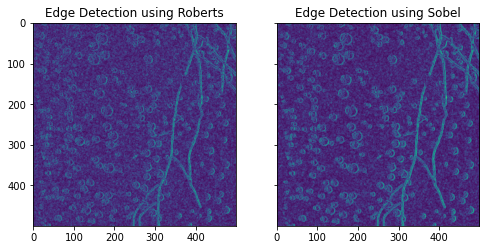

In [26]:
#edge detection
from PIL import ImageEnhance
from skimage import filters

img= io.imread("28\\1-2020-01-28_00-00_0000.png",as_gray=True)

edge_roberts = filters.roberts(img)
edge_sobel = filters.sobel(img)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts)
axes[0].set_title('Edge Detection using Roberts')

axes[1].imshow(edge_sobel)
axes[1].set_title('Edge Detection using Sobel')

Text(0.5, 1.0, 'Skeletonized')

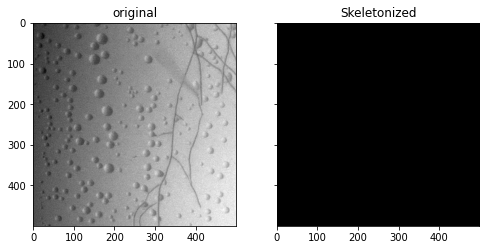

In [27]:
from skimage.morphology import skeletonize
skeleton = skeletonize(img)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('original')

axes[1].imshow(skeleton, cmap=plt.cm.gray)
axes[1].set_title('Skeletonized')

In [13]:
def nothing(x):
    pass
img = cv2.imread('28\\1-2020-01-28_00-00_0001.png')
img = cv2.resize(img, (0, 0), None,0.3,0.3)
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
from skimage.feature import canny
cv2.namedWindow('Image')
cv2.namedWindow('Control')
cv2.createTrackbar('th1(canny_edge)', 'Control',0,500,nothing)
cv2.createTrackbar('th2(canny_edge)', 'Control',0,500,nothing)
cv2.createTrackbar('binarization th', 'Control',0,500,nothing)
cv2.createTrackbar('kernel', 'Control',0,10,nothing)
cv2.createTrackbar('iterations', 'Control',1,5,nothing)
cv2.createTrackbar('Save', 'Control',0,1,nothing)
i=-0
max_val= 255


while True:
    th1= cv2.getTrackbarPos('th1(canny_edge)', 'Control')
    th2= cv2.getTrackbarPos('th2(canny_edge)', 'Control')
    th3= cv2.getTrackbarPos('binarization th', 'Control')
    kernel_size= cv2.getTrackbarPos('kernel', 'Control')
    iterations= cv2.getTrackbarPos('iterations', 'Control')
    save= cv2.getTrackbarPos('Save', 'Control')
    
    canny_edged=cv2.Canny(img, th1, th2)
    
    #creating only odd values for m_blur
    
    kernel= np.ones((kernel_size,kernel_size), np.uint8)
    
    if th1%2==0:
        mblurrval=th1+1
    
    m_blur= cv2.medianBlur(img,mblurrval)
    
    #binarizaton
    
    ret, th_img= cv2.threshold(img,th3,max_val,cv2.THRESH_BINARY)
    
    ret, th_img2= cv2.threshold(img,th3,max_val,cv2.THRESH_BINARY_INV)  
    
    ret, th_img3= cv2.threshold(img,th3,max_val,cv2.THRESH_TOZERO)
    
    ret, th_img4= cv2.threshold(img,th3,max_val,cv2.THRESH_TOZERO_INV)
    
    ret, th_img5= cv2.threshold(img,th3,max_val,cv2.THRESH_TRUNC)
    
    #morphological transforms
    
    dilation= cv2.dilate(th_img2,kernel,iterations=iterations)
    
    erosion= cv2.erode(th_img2,kernel,iterations=iterations)
    
    opening= cv2.morphologyEx(th_img2, cv2.MORPH_OPEN, kernel)
    
    closing= cv2.morphologyEx(th_img2, cv2.MORPH_CLOSE, kernel)
    
    #image gradients and edges
    
    lap=cv2.Laplacian(img, cv2.CV_64F)
    
    #absolute value of laplacian image
    
    lap= np.uint8(np.absolute(lap))
    
    #using sobel edge detection
    
    SobelX= cv2.Sobel(img, cv2.CV_64F,1,0)
    
    SobelY= cv2.Sobel(img, cv2.CV_64F,0,1)
    
    #converting into absolute value
    
    SobelX= np.uint8(np.absolute(SobelX))
    
    SobelY= np.uint8(np.absolute(SobelY))
    
    #STACKING OUTPUT
    
    numpy_horizontal = np.hstack((img, canny_edged,m_blur,th_img,th_img2))
    
    numpy_horizontal2 = np.hstack((th_img3,th_img4,th_img5,dilation, erosion))
    
    numpy_horizontal3 = np.hstack((opening, closing, lap, SobelX, SobelY))
    
    numpy_vertical= np.vstack((numpy_horizontal,numpy_horizontal2, numpy_horizontal3))
    
    cv2.imshow('Control', numpy_vertical)
    i=0
    
    if (save== 1):
        
        save_arr=[img, canny_edged,m_blur,th_img,th_img2,th_img3,th_img4,th_img5,dilation, erosion,opening, closing, lap, SobelX, SobelY]
        #saving outputs
        
        for images in save_arr:
            path='Images\\edge detction image\\'+str(i)+'.jpeg'
            cv2.imwrite(path,images)
            i+=1
        break
        
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

#destroys all window
cv2.destroyAllWindows()

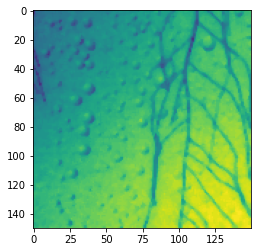

[[[120  52  32]
  [ 50  60  56]
  [ 70  72  38]
  [ 54  94  57]
  [ 66  46  35]
  [ 94  68  14]]]


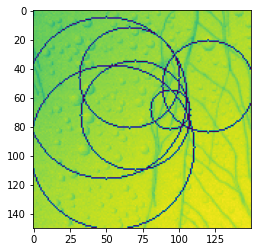

In [49]:
img = cv2.imread('28\\1-2020-01-28_00-00_0001.png')
img = cv2.resize(img, (0, 0), None,0.3,0.3)
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgCopy= img.copy()
m_blur= cv2.medianBlur(img,3)
plt.imshow(m_blur)
plt.show()
circles=cv2.HoughCircles(m_blur, cv2.HOUGH_GRADIENT,1,20, param1= 50, param2=30, minRadius=0, maxRadius=0)
detectedcircles= np.uint16(np.around(circles))
print(detectedcircles)
for x,y,rad in detectedcircles[0,:]:
    cv2.circle(imgCopy,(x,y), rad, (0,255,0),1)

plt.imshow(imgCopy)
plt.show()

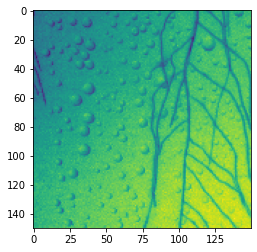

In [43]:
plt.imshow(img)
m_blur= cv2.medianBlur(img,1)
plt.imshow(m_blur)
plt.show()

In [13]:
save_arr=[img, canny_edged,m_blur,th_img,th_img2,th_img3,th_img4,th_img5,dilation, erosion,opening, closing, lap, SobelX, SobelY]
for text in save_arr:
    print(text)

[[ 76  77  77 ... 140 131 129]
 [ 68  77  78 ... 138 130 125]
 [ 78  76  79 ... 127 125 126]
 ...
 [ 93  95  91 ... 165 165 169]
 [ 94  88  91 ... 164 166 166]
 [ 84  94  92 ... 168 167 166]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 76  77  77 ... 140 131 129]
 [ 68  77  78 ... 138 130 125]
 [ 78  76  79 ... 127 125 126]
 ...
 [ 93  95  91 ... 165 165 169]
 [ 94  88  91 ... 164 166 166]
 [ 84  94  92 ... 168 167 166]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 76  77  77 ... 140 131 129]
 [ 68  77  78 ... 138 130 125]
 [ 78  76  79 ... 127 125 126]
 ...
 [ 93  95  91 ... 165 165 169]
 [ 94  88  91 ... 164 166 166]
 [ 84  94  92 ... 168 16

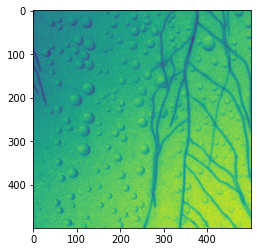

[[  0   0   0 ...   0   0   0]
 [121 120 130 ... 171 172 170]
 [122 117 126 ... 173 174 168]
 ...
 [165 165 164 ... 187 189 191]
 [170 168 166 ... 189 191 190]
 [170 167 166 ... 189 190 187]]


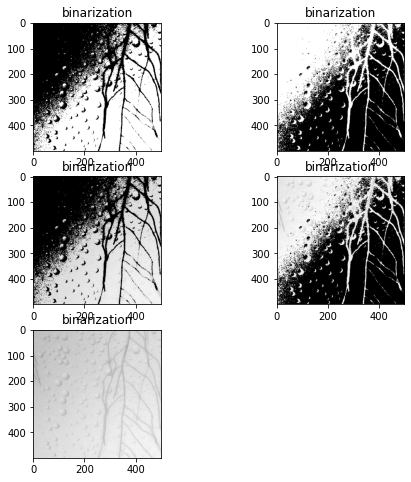

In [80]:
#binarizing images
#otsu binarization will automatically calculate threshold

img = cv2.imread('28\\1-2020-01-28_00-00_0001.png', 0)
th= 0
max_val= 255
imgCopy= img.copy()
plt.imshow(imgCopy)
plt.show()

ret, o1= cv2.threshold(img,th,max_val,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, o2= cv2.threshold(img,th,max_val,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  #~~~~~~~~~~~~~~
ret, o3= cv2.threshold(img,th,max_val,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
ret, o4= cv2.threshold(img,th,max_val,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
ret, o5= cv2.threshold(img,th,max_val,cv2.THRESH_TRUNC+cv2.THRESH_OTSU)
arr=[o1,o2,o3,o4,o5]


row=3
i=0
column=2
fig = plt.figure(figsize=(8,8))
for image in arr:
    i+=1
    fig.add_subplot(row, column, i)
    plt.imshow(image, cmap='gray')
    plt.title("binarization")

i=0


for array in o1:
    j=0
    for value in array:
        if value==0:
            imgCopy[i,j]=0
            j+=1
        else:
            j+=1
            continue
plt.imshow(imgCopy, cmap='gray')     
print(imgCopy)
plt.show()

In [ ]:
row=3
i=0
column=2
fig = plt.figure(figsize=(8,8))
for image in arr:
    i+=1
    fig.add_subplot(row, column, i)
    plt.imshow(image, cmap='gray')
    plt.title("binarization")

In [51]:
print(arr[0])

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


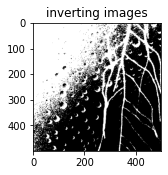

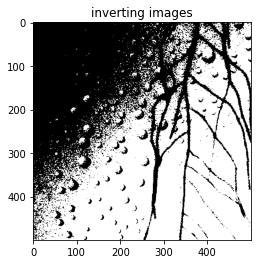

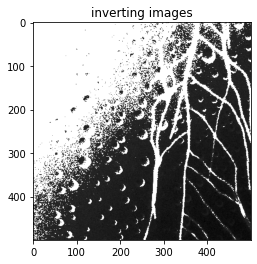

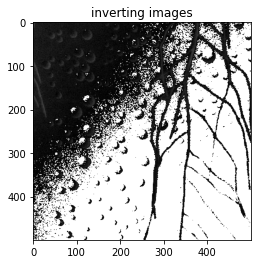

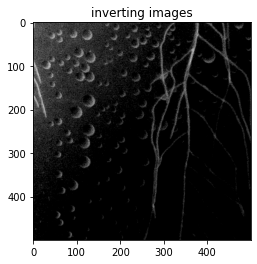

In [57]:
#inverting images
i=0
inv_arr=[]
row=3
i=0
column=2
fig = plt.figure(figsize=(8,8))
for image in arr:
    img=cv2.bitwise_not(image)
    inv_arr.append(img)
    i+=1
    fig.add_subplot(row, column, i)
    plt.imshow(img, cmap='gray')
    plt.title("inverting images")
    plt.show()

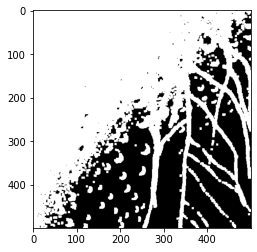

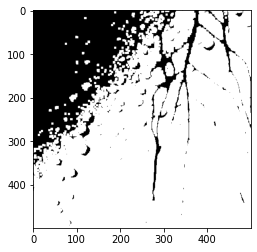

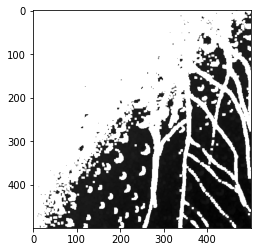

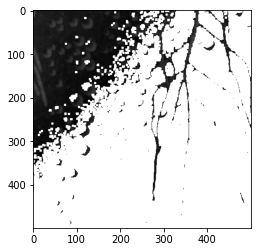

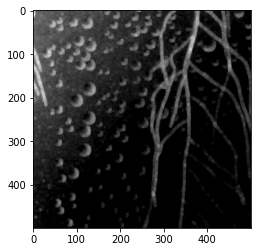

In [53]:
kernel = np.ones((5,5),np.uint8)
for image in inv_arr:
    dil_img = cv2.dilate(image,kernel,iterations = 1)
    plt.imshow(dil_img, cmap='gray')
    plt.show()